# Анализ модели переключения фаз

В этом ноутбуке мы построим:
1. **Кривую обучения** (reward vs episodes)  
2. **Распределение фаз** (как часто модель выбирает каждую)  
3. **Корреляцию** между входными count’ами и фазой  
4. **Динамику** count’ов и фаз во времени  


In [8]:
# Cell 1: базовые импорты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
# cols = ['r', 'l', 't', 'cars_NS', 'cars_EW', 'peds_NS', 'peds_EW']
# train_logs = pd.read_csv(
#     "monitor.csv",
#     comment='#',            # игнорировать строки-комментарии
#     skiprows=[1],           # пропустить строку с "r,l,t"
#     header=None,            # не считать первую не-комментарную строку заголовком
#     names=cols,             # свой список колонок
#     skip_blank_lines=True,  
#     engine='python',        
#     on_bad_lines='skip'     
# )
# train_logs = train_logs.dropna(subset=['cars_NS']).reset_index(drop=True)

# print(train_logs.head())

cols = ['r', 'l', 't', 'cars_NS', 'cars_EW', 'peds_NS', 'peds_EW']
train_logs = pd.read_csv(
    "monitor.csv",
    skiprows=2,            # пропускаем JSON-строку и строку заголовков "r,l,t"
    header=None,
    names=cols,
    skip_blank_lines=True,
    engine='python',
    on_bad_lines='skip'
)
print(train_logs.head())


                  r     l           t  cars_NS  cars_EW  peds_NS  peds_EW
0         -71425.41  2304   23.160003      NaN      NaN      NaN      NaN
1  -71264.1-71073.2  2319   23.329696      8.0     21.0      6.0      8.0
2         --65357.3  2345  134.342854      5.0     20.0      6.0     10.0
3         --64544.6  2356  156.102495      5.0     20.0      6.0     10.0
4         --63086.5  2376  354.457491      6.0     19.0      6.0     10.0


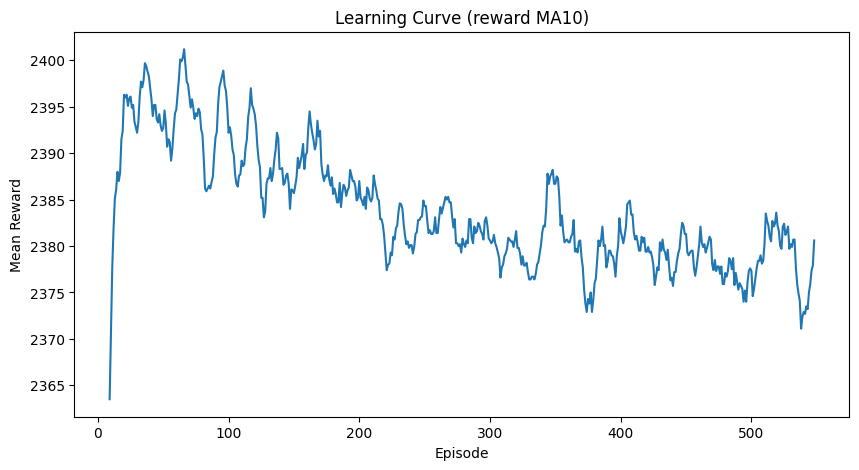

In [6]:
plt.figure(figsize=(10,5))
plt.plot(train_logs['l'].rolling(window=10).mean())
plt.title('Learning Curve (reward MA10)')
plt.xlabel('Episode')
plt.ylabel('Mean Reward')
plt.show()

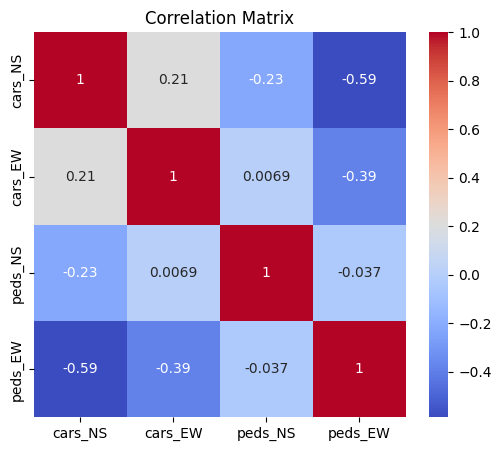

In [7]:
# Корреляция между входами и фазой
df = train_logs[['cars_NS','cars_EW','peds_NS','peds_EW']]
corr = df.corr()
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
df = pd.read_csv(
    "eval_monitor.csv",
    comment='#',       # игнорировать все строки, начинающиеся с #
    engine='python'    # более «мягкий» парсер
)
df.head()

,r,l,t,cars_NS,cars_EW,peds_NS,peds_EW
0,-70924.6,2676,922.135588,7.0,19.0,6.0,10.0
1,-70957.0,2679,927.966513,6.0,17.0,6.0,10.0
2,-70998.7,2679,933.475056,6.0,18.0,6.0,10.0
3,-70800.4,2688,939.028813,7.0,17.0,6.0,10.0
4,-70902.9,2684,944.534917,7.0,18.0,6.0,10.0


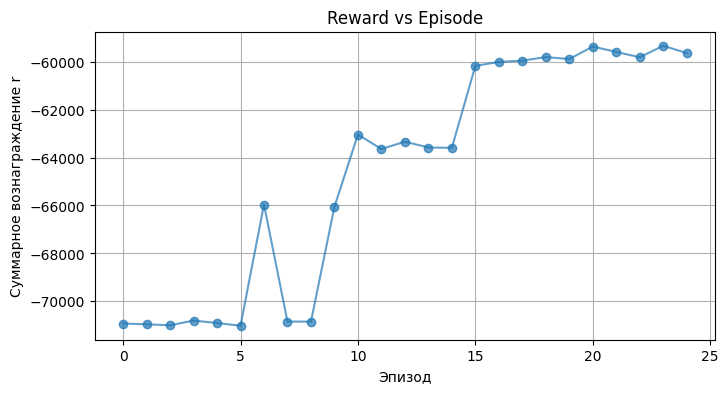

In [10]:
# Cell 3: кривая суммарного вознаграждения R vs номер эпизода
plt.figure(figsize=(8,4))
plt.plot(df.index, df['r'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Эпизод')
plt.ylabel('Суммарное вознаграждение r')
plt.title('Reward vs Episode')
plt.grid(True)
plt.show()


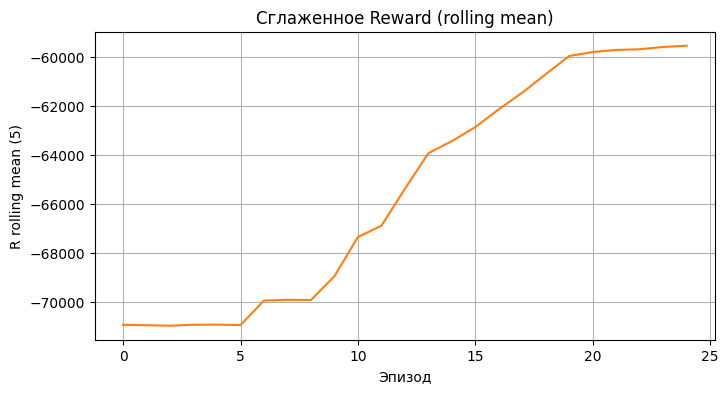

In [11]:
# Cell 4: скользящий средний (окно = 5 эпизодов)
window = 5
rolling = df['r'].rolling(window=window, min_periods=1).mean()
plt.figure(figsize=(8,4))
plt.plot(df.index, rolling, color='C1')
plt.xlabel('Эпизод')
plt.ylabel(f'R rolling mean ({window})')
plt.title('Сглаженное Reward (rolling mean)')
plt.grid(True)
plt.show()


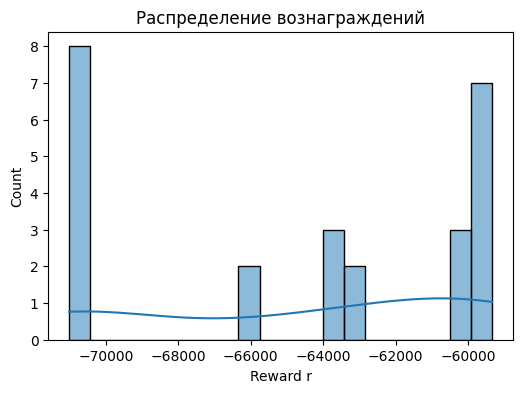

In [12]:
# Cell 7: гистограмма вознаграждений
plt.figure(figsize=(6,4))
sns.histplot(df['r'], bins=20, kde=True)
plt.xlabel('Reward r')
plt.title('Распределение вознаграждений')
plt.show()


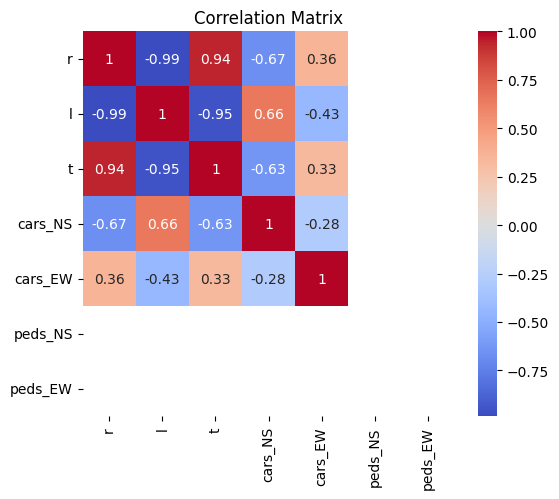

In [13]:
# Cell 8: теплокарта корреляций между всеми числовыми столбцами
plt.figure(figsize=(6,5))
corr = df[['r','l','t','cars_NS','cars_EW','peds_NS','peds_EW']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


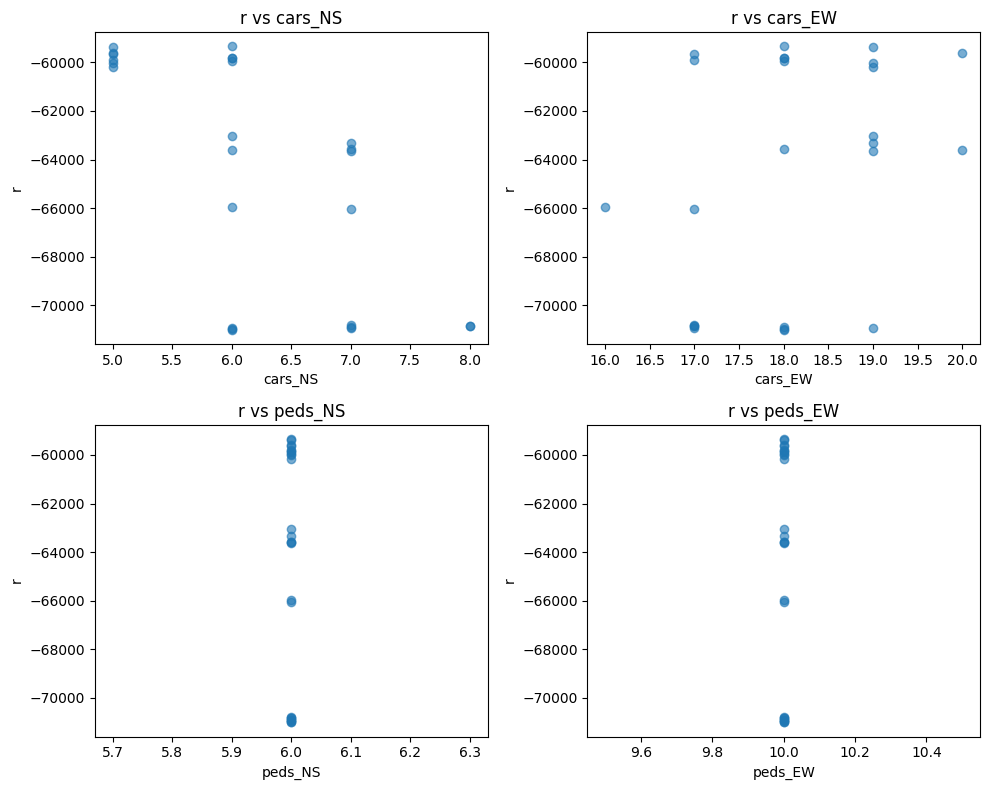

In [14]:
# Cell 9: разброс Reward vs нагрузки
fig, axes = plt.subplots(2,2, figsize=(10,8))
for ax, col in zip(axes.flatten(), ['cars_NS','cars_EW','peds_NS','peds_EW']):
    ax.scatter(df[col], df['r'], alpha=0.6)
    ax.set_xlabel(col)
    ax.set_ylabel('r')
    ax.set_title(f'r vs {col}')
plt.tight_layout()
plt.show()


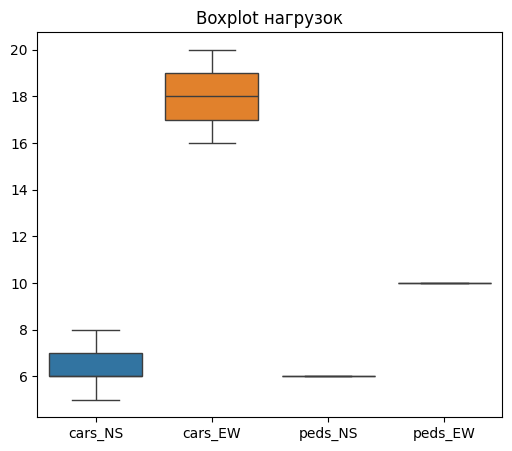

In [15]:
# Cell 10: box-plot нагрузок по четырём группам
plt.figure(figsize=(6,5))
sns.boxplot(data=df[['cars_NS','cars_EW','peds_NS','peds_EW']])
plt.title('Boxplot нагрузок')
plt.show()


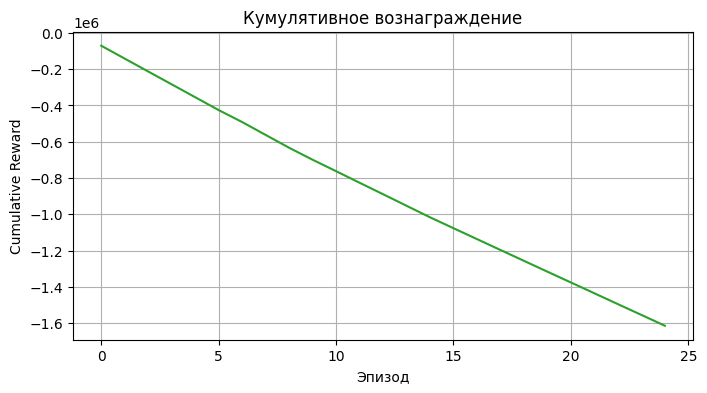

In [16]:
# Cell 11: кумулятивное вознаграждение
cum_r = df['r'].cumsum()
plt.figure(figsize=(8,4))
plt.plot(df.index, cum_r, color='C2')
plt.xlabel('Эпизод')
plt.ylabel('Cumulative Reward')
plt.title('Кумулятивное вознаграждение')
plt.grid(True)
plt.show()


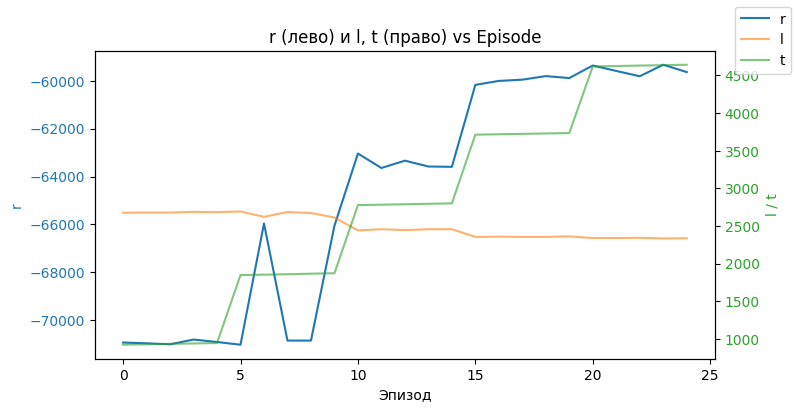

In [17]:
# Cell 12: панель сразу трёх метрик r, l и t (две оси)
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(df.index, df['r'], color='C0', label='r')
ax1.set_xlabel('Эпизод')
ax1.set_ylabel('r', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax2 = ax1.twinx()
ax2.plot(df.index, df['l'], color='C1', alpha=0.6, label='l')
ax2.plot(df.index, df['t'], color='C2', alpha=0.6, label='t')
ax2.set_ylabel('l / t', color='C2')
ax2.tick_params(axis='y', labelcolor='C2')
fig.legend(loc='upper right')
plt.title('r (лево) и l, t (право) vs Episode')
plt.show()


In [ ]:
# Динамика во времени
ctrl = pd.read_csv('controller_logs.csv', parse_dates=['timestamp'])
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(ctrl['timestamp'], ctrl['cars_NS'], label='cars_NS')
ax1.plot(ctrl['timestamp'], ctrl['cars_EW'], label='cars_EW')
ax1.plot(ctrl['timestamp'], ctrl['peds_NS'], label='peds_NS')
ax1.plot(ctrl['timestamp'], ctrl['peds_EW'], label='peds_EW')
ax1.set_ylabel('Count')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(ctrl['timestamp'], ctrl['phase'], '--k', label='phase')
ax2.set_ylabel('Phase')
ax2.legend(loc='upper right')

plt.title('Dynamics of counts and phase over time')
plt.show()